# The Coding School's 2020 Quantum Computing Summer Camp
Day 3: Introduction to Quantum Computing I \
July 15th 2020 \
Hands-on activity

# Basics of Quantum Computing
Quantum computers have access to certain gates that perform unitary evolutions on collections of two-level systems (spin-1/2 particles, for example). \
Let's review the 1-qubit $\textbf{quantum gates}$ we have learned so far. \
\
Hadamard gate
$H = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
$
\
\
Pauli-X gate
$X = \begin{pmatrix}
0 & 1 \\
0 & 1
\end{pmatrix}
$ 
\
\
Pauli-Y gate
$Y = \begin{pmatrix}
0 & -i \\
i & 0
\end{pmatrix}
$ 
\
\
Pauli-Z gate
$Z = \begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}
$ 
\
\
S gate
$S = \begin{pmatrix}
1 & 0 \\
0 & i
\end{pmatrix}
$ 
\
\
T gate
$T = \begin{pmatrix}
1 & 0 \\
0 & e^{i\frac{\pi}{4}}
\end{pmatrix}
$
\
\
We also have 2-qubit gates such as the CNOT (controlled-not), that either flips or not the state of one qubit in function of the direction of the spin of the control qubit.
$$CNOT(\left|0\right\rangle\otimes\left|0\right\rangle) = \left|0\right\rangle \otimes \left|0\right\rangle $$
$$CNOT(\left|0\right\rangle\otimes\left|1\right\rangle) = \left|0\right\rangle \otimes \left|1\right\rangle $$
$$CNOT(\left|1\right\rangle\otimes\left|0\right\rangle) = \left|1\right\rangle \otimes \left|1\right\rangle $$
$$CNOT(\left|1\right\rangle\otimes\left|1\right\rangle) = \left|1\right\rangle \otimes \left|0\right\rangle $$

# General rotations

By convention, the chronology of the circuit diagram is from left to right. Other different forms of spin rotation operators that rotate quantums states to an arbitrary $(\theta, \phi)$ can be expressed as a combination of the gates above.
For the sake of generality, we introduce a general rotation gate, represented in the IBM Quantum Cumpter as $u_3$. The $u_3$ takes three parameters $(\lambda,\theta,\phi)$ and has the form

$ u_3=
\begin{pmatrix}
\cos{\big(\frac{\theta}{2}\big)} & -e^{i\lambda}\sin{\big(\frac{\theta}{2}\big)}\\
e^{i\phi}\sin{\big(\frac{\theta}{2}\big)} & e^{i(\lambda+\phi)}\sin{\big(\frac{\theta}{2}\big)}
\end{pmatrix}
$


# Measurement and basis

A quantum computer works with the conventional basis of $\{\left|0\right\rangle, \left|1\right\rangle\}$. As discussed earlier, we can measure states in different (and arbitrary) basis. We can achieve this by rotating the arbitrary basis to the $Z$ basis $\{\left|0\right\rangle, \left|1\right\rangle\}$ and performing the usual measurement. 

# Performing the Bell Experiment on the IBM quantum computer

Consider the general state
$$\left|\psi(\theta)\right\rangle = \cos{\big(\frac{\theta}{2}\big)}\left|0\right\rangle\otimes\left|0\right\rangle + \sin{\big(\frac{\theta}{2}\big)}\left|1\right\rangle\otimes\left|1\right\rangle$$
Note that when $\theta = 0$, this is state is unentangled (state $\left|0\right\rangle\otimes\left|0\right\rangle$), whereas for any $\theta > 0$, it is entangled and for $\theta= \pi/2$ reduces to $\left|\beta_{00}\right\rangle$.

1. Show that the state $\cos{\theta/2}\left|0\right\rangle+\sin{\theta/2}\left|1\right\rangle$ for an angle $\theta$ using the gate $u_3(\theta,0,0)$ with $\left|0\right\rangle$ as input.

2. Using part (1) show that the following circuit prepares the state $\left|\psi(\theta)\right\rangle = \cos{\big(\frac{\theta}{2}\big)}\left|0\right\rangle\otimes\left|0\right\rangle + \sin{\big(\frac{\theta}{2}\big)}\left|1\right\rangle\otimes\left|1\right\rangle$.

In [1]:
from qiskit import QuantumCircuit
circuit_2 = QuantumCircuit(2, 2)
circuit_2.u3(0,0,0,0)
circuit_2.cx(0, 1)
circuit_2.draw()

┌───────────┐     
q_0: ┤ U3(0,0,0) ├──■──
     └───────────┘┌─┴─┐
q_1: ─────────────┤ X ├
                  └───┘
c_0: ══════════════════
                       
c_1: ══════════════════

3. Show that measurement in the $X$ basis can be achieved by first applying a Hadamard gate $H$ and then measuring in the $Z$ basis.

4. Show that measurements in the $W=\frac{1}{\sqrt{2}}(X+Z)$ basis can be performed by applying the sequence $HTHS$ and then measuring in the $Z$ basis.

5. Show that the measurement in the $V=\frac{1}{\sqrt{2}}(Z-X)$ basis is achieved by applying 
$HT^{\dagger}HS$ and a $Z$ measurement. 

# IBM Quantum Experience Circuit Composer
Let's start by importing the standard Qiskit libraries and loading IBM Q account(s).

In [2]:
%matplotlib inline
from qiskit import execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *

In [4]:
# Loading your IBM Q account(s)
IBMQ.save_account("YOUR-API-TOKEN", overwrite=True) # replace YOUR-API-TOKEN with your token from your IBM quantum experience account
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-education', group='tcs-karamlou', project='summer-2020')

# Bell states 
Recall that Bell states are the sets of maximally entangled states in the two-qubit space and form a complete basis.
$$\left|\beta_{00}\right\rangle=\frac{1}{\sqrt{2}}(\left|0\right\rangle\left|0\right\rangle+\left|1\right\rangle\left|1\right\rangle)$$
$$\left|\beta_{01}\right\rangle=\frac{1}{\sqrt{2}}(\left|0\right\rangle\left|1\right\rangle+\left|1\right\rangle\left|0\right\rangle)$$
$$\left|\beta_{10}\right\rangle=\frac{1}{\sqrt{2}}(\left|0\right\rangle\left|0\right\rangle-\left|1\right\rangle\left|1\right\rangle)$$
$$\left|\beta_{11}\right\rangle=\frac{1}{\sqrt{2}}(\left|0\right\rangle\left|1\right\rangle-\left|0\right\rangle\left|1\right\rangle)$$

1. See below as an example how we create the circuit that creates the $\left|\beta_{00}\right\rangle$ state using a Hadamard gate on $q[0]$ and a CNOT with the control qubit on $q[0]$, and observe the ploted statistical properties to measure each two qubit state.

In [5]:
# Create a new Quantum Circuit
circuit = QuantumCircuit(2, 2)
# Add an H gate on qubit 0
circuit.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)
# Map the quantum measurement to the classical bits
# circuit.measure([0,1], [0,1])

# Execute
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')
# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=1000)
# Grab results from the job
result = job.result()

# Return counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)

# Draw the circuit
circuit.draw()


Total count for 00 and 11 are: {'00': 1000}


┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
c_0: ══════════
               
c_1: ══════════

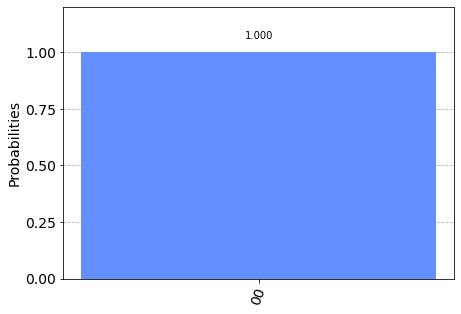

In [6]:
# Plot a histogram
plot_histogram(counts)

$\textbf{Exercises}$
2. Adapt the circuit from part (1) to produce the other three Bell states: $\left|\beta_{01}\right\rangle$, $\left|\beta_{10}\right\rangle$, $\left|\beta_{11}\right\rangle$ and plot their probability distributions in a separate histogram.

$$\left|\beta_{01}\right\rangle=\frac{1}{\sqrt{2}}(\left|0\right\rangle\left|1\right\rangle+\left|1\right\rangle\left|0\right\rangle)$$

In [7]:
# # Create a new circuit
# circuit = QuantumCircuit(2, 2)
# # Add quantum gates
# circuit.h(0)
# circuit.cx(0, 1)
# # Map the quantum measurement to the classical bits
# circuit.measure([0,1], [0,1])

# # Execute
# simulator = Aer.get_backend('qasm_simulator')
# job = execute(circuit, simulator, shots=1000)
# result = job.result()

# # Return counts
# counts = result.get_counts(circuit)
# print("\nTotal count for 00 and 11 are:",counts)

# # Draw the circuit
# circuit.draw()

$$\left|\beta_{10}\right\rangle=\frac{1}{\sqrt{2}}(\left|0\right\rangle\left|0\right\rangle-\left|1\right\rangle\left|1\right\rangle)$$

In [8]:
# # Create a new circuit
# circuit = QuantumCircuit(2, 2)
# # Add quantum gates
# circuit.h(0)
# circuit.cx(0, 1)
# # Map the quantum measurement to the classical bits
# circuit.measure([0,1], [0,1])

# # Execute
# simulator = Aer.get_backend('qasm_simulator')
# job = execute(circuit, simulator, shots=1000)
# result = job.result()

# # Return counts
# counts = result.get_counts(circuit)
# print("\nTotal count for 00 and 11 are:",counts)

# # Draw the circuit
# circuit.draw()

$$\left|\beta_{11}\right\rangle=\frac{1}{\sqrt{2}}(\left|0\right\rangle\left|1\right\rangle-\left|1\right\rangle\left|0\right\rangle)$$

In [9]:
# # Create a new circuit
# circuit = QuantumCircuit(2, 2)
# # Add quantum gates
# circuit.h(0)
# circuit.cx(0, 1)
# # Map the quantum measurement to the classical bits
# circuit.measure([0,1], [0,1])

# # Execute
# simulator = Aer.get_backend('qasm_simulator')
# job = execute(circuit, simulator, shots=1000)
# result = job.result()

# # Return counts
# counts = result.get_counts(circuit)
# print("\nTotal count for 00 and 11 are:",counts)

# # Draw the circuit
# circuit.draw()


# Simulation
Log in the IBM Q Experience and draw a circuit using the following code or the $\textit{IBM Circuit Composer}$ for preparing the state $\left|\psi(\theta)\right\rangle$ for $\theta = 0, \frac{\pi}{6}, \frac{\pi}{4}, \frac{\pi}{2}$ and performing the measurement in the $X$, $Z$, $W$ and $V$ basis. \
Estimate $\langle Z\otimes W \rangle$, $\langle Z\otimes V \rangle$, $\langle X\otimes V \rangle$ and $\langle X\otimes W \rangle$ for each $\theta$. \
Calculate $C = \langle Z\otimes W \rangle + \langle Z\otimes V \rangle + \langle X\otimes W \rangle - \langle X\otimes V \rangle$ for each $\theta$ and report your results in a Table. 
\
$\textbf{Hint:}$ Here is the circuit diagram for measuring $\left|\psi(\theta/6)\right\rangle$ in the $X\otimes V$ basis.

The operators $X$, $Z$, $V$ and $W$ all have $\pm$ eigenvalues. The $0$ and $1$ correspond to the $+1$ and $-1$ eigenvalues respectively. The probability is written as $P(q[0],q[1])$.

| $\theta=$ | P(+1,+1) | P(-1,-1) | P(+1,-1) | P(-1,+1) | Expectation |
| ----------- | ----- | ----- | ----- | ----- | ----- |
| $ Z\otimes W $ |  |  |  |  |  |
| $ Z\otimes V $ |  |  |  |  |  |
| $ X\otimes W $ |  |  |  |  |  |
| $ X\otimes V $ |  |  |  |  |  |

In [10]:
circuit_sim = QuantumCircuit(3, 3)
circuit_sim.u3(0,0,0,0)
circuit_sim.cx(0, 1)
circuit_sim.h(0)
circuit_sim.s(1)
circuit_sim.h(1)
circuit_sim.tdg(1)
circuit_sim.h(1)

circuit_sim.measure([1,0], [0,1])

simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit_sim, simulator, shots=1000)
result = job.result()

counts_sim = result.get_counts(circuit_sim)
print("\nTotal count for 00 and 11 are:",counts_sim)

circuit_sim.draw()


Total count for 00 and 11 are: {'000': 445, '001': 74, '010': 399, '011': 82}


┌───────────┐     ┌───┐     ┌─┐               
q_0: ┤ U3(0,0,0) ├──■──┤ H ├─────┤M├───────────────
     └───────────┘┌─┴─┐├───┤┌───┐└╥┘┌─────┐┌───┐┌─┐
q_1: ─────────────┤ X ├┤ S ├┤ H ├─╫─┤ TDG ├┤ H ├┤M├
                  └───┘└───┘└───┘ ║ └─────┘└───┘└╥┘
q_2: ─────────────────────────────╫──────────────╫─
                                  ║              ║ 
c_0: ═════════════════════════════╬══════════════╩═
                                  ║                
c_1: ═════════════════════════════╩════════════════
                                                   
c_2: ══════════════════════════════════════════════

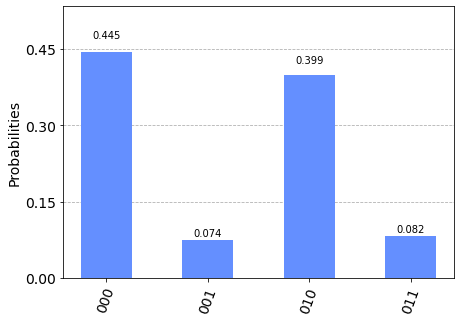

In [11]:
plot_histogram(counts_sim)

# Actual Computation
In this part we run a previous measurement of your choice in the previous section on an actual quantum computer.

In [12]:
# Use the backend that is least busy to get access to the machine faster
from qiskit.providers.ibmq import least_busy
# For example:
my_backend = least_busy(provider.backends())
print(my_backend)

ibmq_rome


In [13]:
# Now we can use actual hardware wherever we would have called used a simulator backend before:

# circuit = QuantumCircuit(2, 2)
# circuit.h(0)
# circuit.cx(0, 1)
# # Execute
# hardware = least_busy(provider.backends())
# job = execute(circuit, hardware, shots=1000)
# result = job.result()

In [14]:
print(result)

Result(backend_name='ibmq_rome', backend_version='1.1.0', date=datetime.datetime(2020, 7, 15, 2, 37, 9, tzinfo=datetime.timezone.utc), execution_id='1082324e-c644-11ea-ba02-b02628ea1e00', header=Obj(backend_name='ibmq_rome', backend_version='1.1.0'), job_id='5f0e6b9ae9a652001a7fcd88', qobj_id='5fa0f916-71dd-4193-81a4-c806c550cb0a', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=1000)), header=Obj(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], memory_slots=2, n_qubits=5, name='circuit13', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]), meas_level=2, memory=False, shots=1000, success=True)], status='Successful completion', success=True, time_taken=8.512080430984497)
